# S09 T01: Tasca Feature Engineering

## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [83]:
#Importamos las librerias:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#### Dummies

In [84]:
# Utilizaremos el mismo dataset de jugadores de la NBA de la S06_T01 y S08_T01: https://www.kaggle.com/justinas/nba-players-data
df = pd.read_csv(r'..\DB\all_seasons.csv')
df.head(2)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97


In [85]:
# Podemos normalizar un atributo en dummy, en un dataframe aparte, como a continuación con "team_abbreviation":
team_dummy = pd.get_dummies(df['team_abbreviation'])
team_dummy.head(2)

,ATL,BKN,BOS,CHA,CHH,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NJN,NOH,NOK,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN,WAS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Observamos que se ha creado una tabla de 0 y 1, según si cada jugador juega en un equipo (1) o no (0)

In [86]:
# O podemos normalizar todas las columnas que queramos:
df_dummy = pd.get_dummies(df, columns=['team_abbreviation', 'college', 'country'])
print(df_dummy.shape) # En este caso, normalizar "college" no tiene demasiado sentido
df_dummy.head(2)

(11700, 470)


,Unnamed: 0,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,team_abbreviation_ATL,team_abbreviation_BKN,team_abbreviation_BOS,team_abbreviation_CHA,team_abbreviation_CHH,team_abbreviation_CHI,team_abbreviation_CLE,team_abbreviation_DAL,team_abbreviation_DEN,team_abbreviation_DET,team_abbreviation_GSW,team_abbreviation_HOU,team_abbreviation_IND,team_abbreviation_LAC,team_abbreviation_LAL,team_abbreviation_MEM,team_abbreviation_MIA,team_abbreviation_MIL,team_abbreviation_MIN,team_abbreviation_NJN,team_abbreviation_NOH,team_abbreviation_NOK,team_abbreviation_NOP,team_abbreviation_NYK,team_abbreviation_OKC,team_abbreviation_ORL,team_abbreviation_PHI,team_abbreviation_PHX,team_abbreviation_POR,team_abbreviation_SAC,team_abbreviation_SAS,team_abbreviation_SEA,team_abbreviation_TOR,team_abbreviation_UTA,team_abbreviation_VAN,team_abbreviation_WAS,college_,college_,college_Alabama,college_Alabama A&M,college_Alabama Huntsville,college_Alabama-Birmingham,college_Albany State (GA),college_American International,college_American University,college_Arizona,college_Arizona State,college_Arkansas,college_Arkansas-Little Rock,college_Auburn,college_Auburn-Montgomery,college_Augsburg,college_Augusta State,college_Augustana (SD),college_Austin Peay,college_Ball State,college_Barton Community College,college_Baylor,college_Belmont,college_Blinn,college_Boise State,college_Boston College,college_Boston U.,college_Bowling Green,college_Bradley,college_Brigham Young,college_Brigham Young-Hawaii,college_Bucknell,college_Butler,college_Butler Community College,college_Cal Poly,college_Cal State-Bakersfield,college_Cal State-Fullerton,college_Cal State-Long Beach,college_Cal State-San Bernardino,college_Cal-Santa Barbara,college_California,college_California State-Long Beach,college_California-Berkeley,college_California-Irvine,college_California-Los Angeles,college_California-Santa Barbara,college_Campbell University,college_Centenary (LA),college_Central Arkansas,college_Central Connecticut State,college_Central Florida,college_Central Michigan,college_Central Oklahoma,college_Central State (OH),college_Cincinnati,college_Clemson,college_Cleveland State,college_Colgate,college_College of Charleston,college_Colorado,college_Colorado State,college_Connecticut,college_Coppin State,college_Cornell,college_Creighton,college_Davidson,college_Dayton,college_DePaul,college_Delaware,college_Delaware State,college_Delta State,college_Detroit Mercy,college_Drexel,college_Duke,college_Duquesne,college_East Carolina,college_Eastern Illinois,college_Eastern Michigan,college_Eastern Washington,college_Fairfield,college_Fayetteville State,college_Florida,college_Florida A&M,college_Florida Gulf Coast,college_Florida International,college_Florida State,college_Fordham,college_Fresno State,college_George Mason,college_George Washington,college_Georgetown,college_Georgia,college_Georgia Institute of Technology,college_Georgia Southern,college_Georgia State,college_Georgia Tech,college_Gonzaga,college_Grand Canyon,college_Hampton,college_Hartford,college_Harvard,college_Hawaii,college_Hofstra,college_Holy Cross,college_Houston,college_Idaho,college_Illinois,college_Illinois State,college_Indian Hills Community College,college_Indiana,college_Indiana Purdue-Indianapolis,college_Indiana-Purdue Fort Wayne,college_Indiana-Purdue Indianapolis,college_Iona,college_Iowa,college_Iowa State,college_Jackson State,college_Jacksonville,college_Jacksonville State,college_Kansas,college_Kansas State,college_Kent State,college_Kentucky,college_La Salle,college_Lamar,college_Le Moyne,college_Lebanon Valley,college_Lehigh,college_Liberty,college_Lipscomb,college_Long Beach State,college_Long Island-Brooklyn,college_Longwood,college_Louisana-Lafayette,college_Louisiana State,college_Louisiana Tech,college_Louisiana-Lafayette,college_Louisiana-Monroe,college_Louisville,college_Loyol

#### StandardScaler

In [87]:
# A continuación normalizaremos las variables numéricas: "player_height" y "player_weight"
# Con este método, buscamos que la media sea igual a 0 y la desviación estándar sea igual a 1
from sklearn.preprocessing import StandardScaler # lo importamos
ss = StandardScaler()
df_stand = ss.fit_transform(df[['player_height','player_weight']])
print(f"La media de la altura sin estandarizar es: {df.player_height.mean()}\nLa media de altura después de estandarizar es {df_stand.mean()}")
print(f"La desviación de la altura sin estandarizar es: {df.player_height.std()}\nLa desviación de la altura después de estandarizar es {df_stand.std()}")

La media de la altura sin estandarizar es: 200.7285008547074
La media de altura después de estandarizar es 1.8947806286936006e-16
La desviación de la altura sin estandarizar es: 9.16982713551731
La desviación de la altura después de estandarizar es 1.0


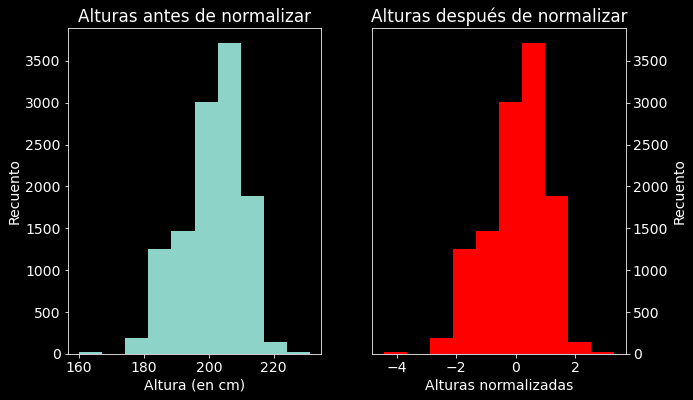

In [88]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

ax = plt.subplot(1, 2, 1) 
plt.hist(df['player_height'])
plt.title("Alturas antes de normalizar")
plt.xlabel('Altura (en cm)')
plt.ylabel('Recuento')

ax2 = plt.subplot(1, 2, 2) 
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.hist(df_stand[:,0], color="r")
plt.title("Alturas después de normalizar")
plt.xlabel('Alturas normalizadas')
plt.ylabel('Recuento')

plt.show()

## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

In [89]:
# Para poder aplicar el PCA, primero debemos estandarizar las variables

features = ['age', 'player_height', 'player_weight', 'gp', 'pts','reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target. Escogemos como "target" 'country': para ver si existen diferencies entre lugar de procedencia del jugador
y = df.loc[:,['country']].values

# Standardizing the features
x = ss.fit_transform(x)

# Guardamos los valores estandarizados en un df
df_pca = pd.DataFrame(data=x, columns=features)
df_pca.head(1)

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,-1.18253,1.377566,0.484381,0.771802,-0.565712,0.375913,-0.731669,0.69279,1.65206,0.644467,-0.81918,0.260401,-0.840706


In [108]:
# Seleccionamos el número de dimensiones que queremos
dim = 6

# Importamos y ejecutamos el PCA 

from sklearn.decomposition import PCA
pca = PCA(n_components=dim)
principalComponents = pca.fit_transform(x)
pca_columns = [f'principal component {x}' for x in range(1, dim+1)]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_columns) 

# Agregamos la columna objetivo
df_final = pd.concat([principalDf, df[['country']]], axis = 1)
df_final.head(2)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,country
0,2.469169,-0.392714,-0.430800,1.343567,0.340303,-1.004669,USA
1,3.007108,1.804639,2.350135,-0.952920,1.330193,0.795527,USA


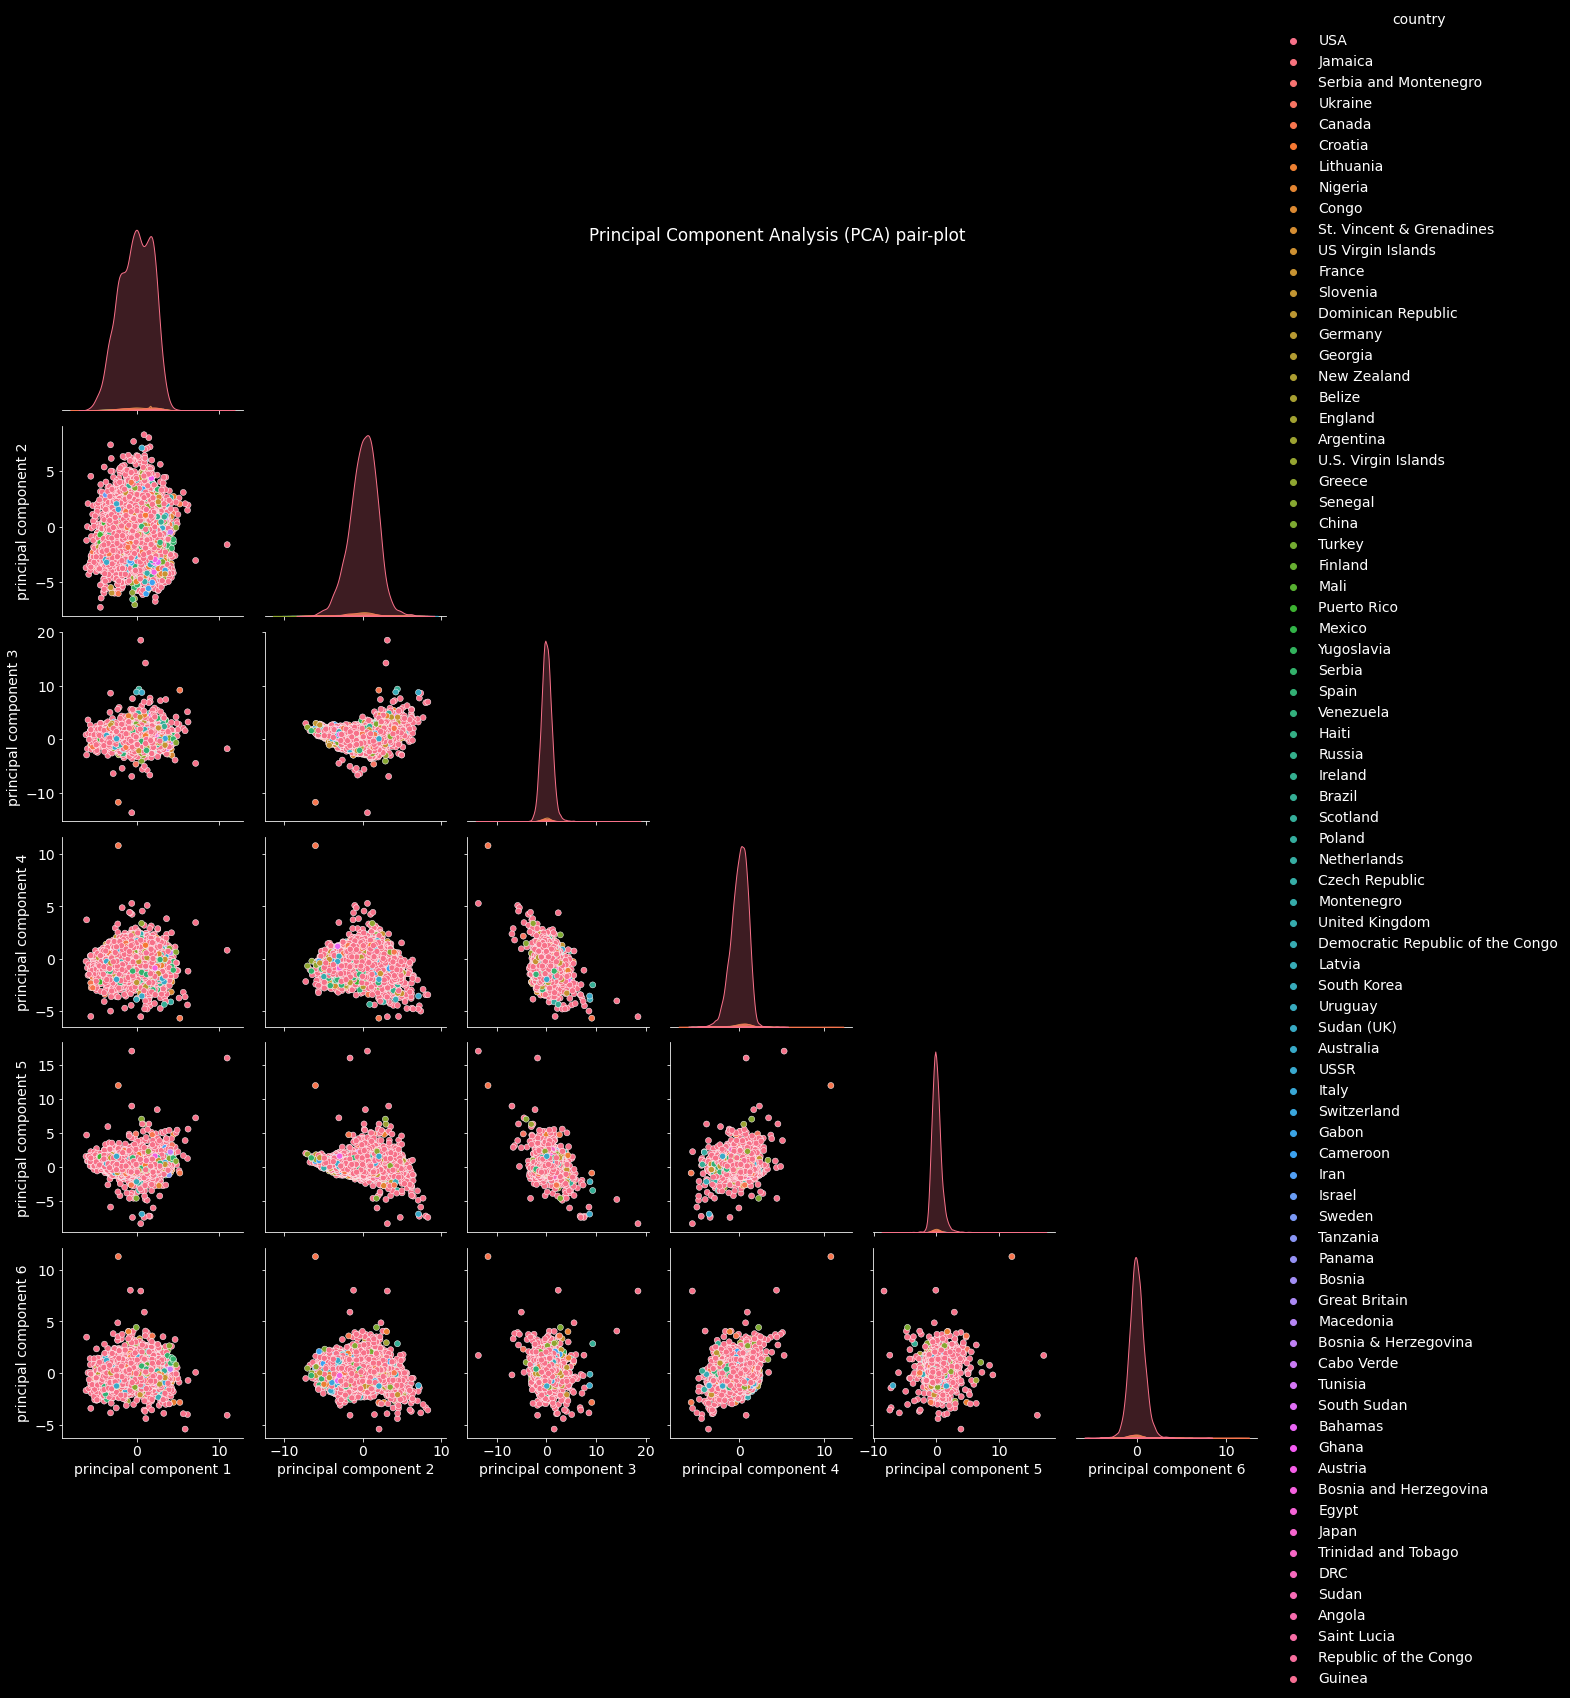

In [103]:
# PCA pair-plot
fig = sns.pairplot(df_final, corner=True, height=3) # con hue='country', tarda mucho. Se podría agrupar por continente para que no hubiese tantos países
fig.fig.suptitle('Principal Component Analysis (PCA) pair-plot')
plt.show()

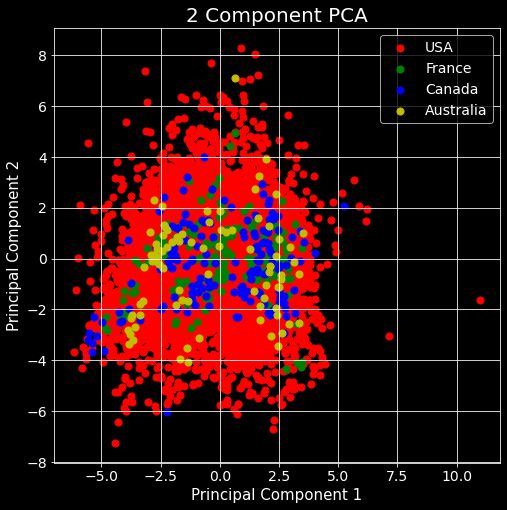

In [92]:
# Visualizaremos los datos de dim = 2

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['USA', 'France', 'Canada', 'Australia'] # Podríamos poner más países
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['country'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1']
               , df_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [104]:
print(pca.explained_variance_ratio_)
suma_ratio = pca.explained_variance_ratio_.cumsum()
suma_ratio

[0.30527371 0.24652573 0.09747102 0.07797183 0.0574229  0.05474298]


array([0.30527371, 0.55179945, 0.64927047, 0.7272423 , 0.7846652 ,
       0.83940818])

Vemos que el componente principal contiene un 30,53% de varianza y el segundo principal contiene un 24,65% de varianza. Estas dos componentes contienen el 55% de la información.

Si escojemos 4 dimensiones en vez de 2, este porcentaje sube hasta el 72,72% 

Si escojemos 6 dimensiones, este porcentaje sube hasta el 83,94%. Con menos de la mitad de características, mantenemos más de un 80% de la información

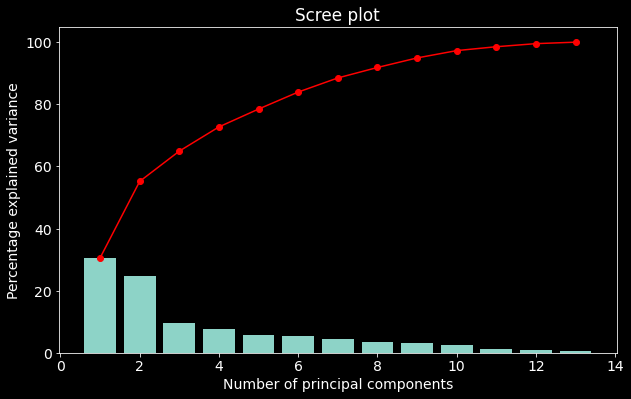

In [107]:
# Creamos un plot comparando el ratio de varianza con el acumulado.
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show()

## Nivell 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

In [129]:
# Normalizaremos las columnas 'age', 'player_height', 'player_weight' con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

age_min = df['age'].min()
age_max = df['age'].max()
height_min = df['player_height'].min()
height_max = df['player_height'].max()
weight_min = df['player_weight'].min()
weight_max = df['player_weight'].max()

print(f'Edad mínima: {age_min}\nEdad máxima: {age_max}\nAltura mínima: {height_min}\nAltura máxima: {height_max}\nPeso mínimo: {weight_min}\nPeso máximo: {weight_max}\n')
df[['age', 'player_height', 'player_weight']].describe()


Edad mínima: 18.0
Edad máxima: 44.0
Altura mínima: 160.02
Altura máxima: 231.14
Peso mínimo: 60.327736
Peso máximo: 163.29312



,age,player_height,player_weight
count,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791
std,4.340006,9.169827,12.526481
min,18.000000,160.020000,60.327736
25%,24.000000,193.040000,90.718400
50%,26.000000,200.660000,99.790240
75%,30.000000,208.280000,108.862080
max,44.000000,231.140000,163.293120


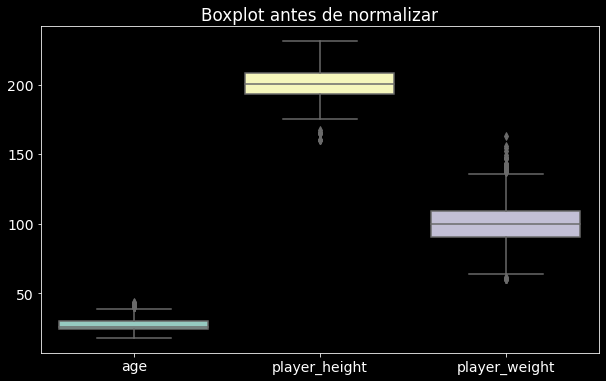

In [124]:
sns.boxplot(data=df[['age','player_height','player_weight']])
plt.title('Boxplot antes de normalizar')
plt.show()

In [130]:
X = df[['age', 'player_height', 'player_weight']]
mms = MinMaxScaler()
df_normalizado = pd.DataFrame(mms.fit_transform(X), columns=['age', 'player_height', 'player_weight'])
agen_min = df_normalizado['age'].min()
agen_max = df_normalizado['age'].max()
heightn_min = df_normalizado['player_height'].min()
heightn_max = df_normalizado['player_height'].max()
weightn_min = df_normalizado['player_weight'].min()
weightn_max = df_normalizado['player_weight'].max()

print(f'Edad mínima: {agen_min}\nEdad máxima: {agen_max}\nAltura mínima: {heightn_min}\nAltura máxima: {heightn_max}\nPeso mínimo: {weightn_min}\nPeso máximo: {weightn_max}\n')
df_normalizado.describe()

Edad mínima: 0.0
Edad máxima: 1.0000000000000002
Altura mínima: 0.0
Altura máxima: 1.0
Peso mínimo: 0.0
Peso máximo: 0.9999999999999999



,age,player_height,player_weight
count,11700.000000,11700.000000,11700.000000
mean,0.351229,0.572392,0.390413
std,0.166923,0.128935,0.121657
min,0.000000,0.000000,0.000000
25%,0.230769,0.464286,0.295154
50%,0.307692,0.571429,0.383260
75%,0.461538,0.678571,0.471366
max,1.000000,1.000000,1.000000


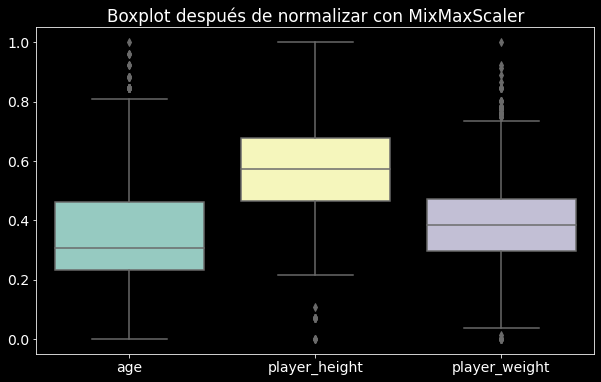

In [132]:
sns.boxplot(data=df_normalizado[['age','player_height','player_weight']])
plt.title('Boxplot después de normalizar con MixMaxScaler')
plt.show()

In [131]:
# Probaremos de normalizar los datos con RobustScaler
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_robust = pd.DataFrame(robust.fit_transform(X), columns=['age', 'player_height', 'player_weight'])
ager_min = df_robust['age'].min()
ager_max = df_robust['age'].max()
heightr_min = df_robust['player_height'].min()
heightr_max = df_robust['player_height'].max()
weightr_min = df_robust['player_weight'].min()
weightr_max = df_robust['player_weight'].max()

print(f'Edad mínima: {ager_min}\nEdad máxima: {ager_max}\nAltura mínima: {heightr_min}\nAltura máxima: {heightr_max}\nPeso mínimo: {weightr_min}\nPeso máximo: {weightr_max}\n')
df_robust[['age', 'player_height', 'player_weight']].describe()

Edad mínima: -1.3333333333333333
Edad máxima: 3.0
Altura mínima: -2.6666666666666643
Altura máxima: 1.9999999999999982
Peso mínimo: -2.1749999999999994
Peso máximo: 3.4999999999999987



,age,player_height,player_weight
count,11700.000000,11700.000000,11700.000000
mean,0.188661,0.004495,0.040595
std,0.723334,0.601695,0.690405
min,-1.333333,-2.666667,-2.175000
25%,-0.333333,-0.500000,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.666667,0.500000,0.500000
max,3.000000,2.000000,3.500000


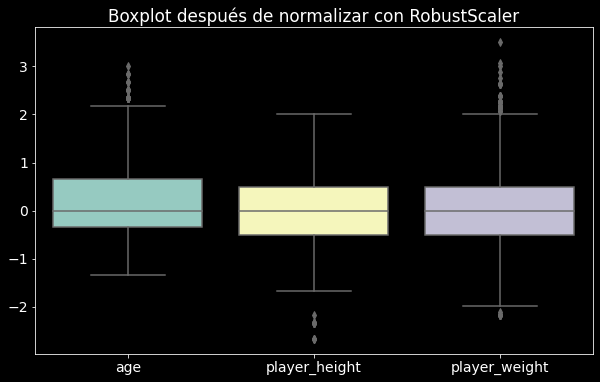

In [133]:
sns.boxplot(data=df_robust[['age','player_height','player_weight']])
plt.title('Boxplot después de normalizar con RobustScaler')
plt.show()

Vemos que con RobustScaler, hemos centrado los datos en 0, al contrario que con el MinMaxScaler

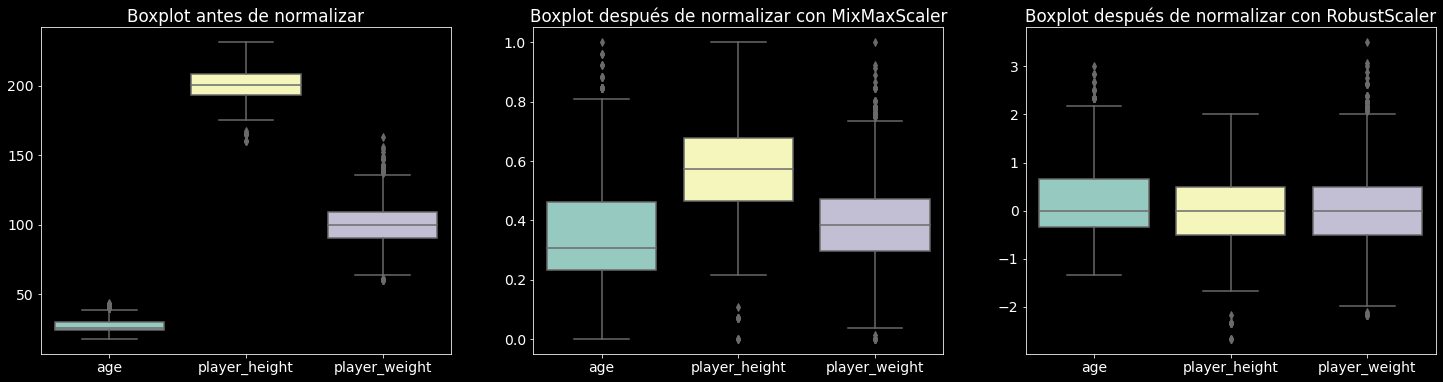

In [137]:
# Comparativa entre los datos iniciales, datos normalizados con MinMaxScaler y datos normalizados con RobustScaler
plt.rcParams.update({'font.size': 14, 'figure.figsize': (25, 6)})

ax = plt.subplot(1, 3, 1) 
sns.boxplot(data=df[['age','player_height','player_weight']])
plt.title('Boxplot antes de normalizar')

ax2 = plt.subplot(1, 3, 2) 
sns.boxplot(data=df_normalizado[['age','player_height','player_weight']])
plt.title('Boxplot después de normalizar con MixMaxScaler')

ax3 = plt.subplot(1, 3, 3) 
sns.boxplot(data=df_robust[['age','player_height','player_weight']])
plt.title('Boxplot después de normalizar con RobustScaler')

plt.show()